In [1]:
%matplotlib inline

In [2]:
# lmfit_demo - Script showing how the LMfit package works for curve-fitting

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters

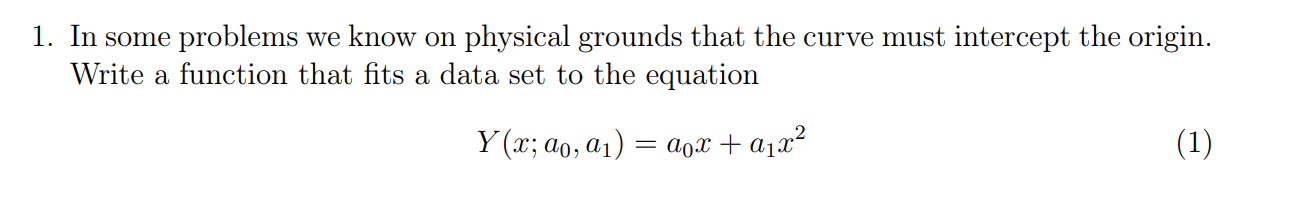

In [3]:
def part1(x, a, b):
    return(a*x + b*x**2)

def partTwo(speed, airFlag, graphFlag):
    '''Write a function that takes in 
    :param: speed - an initial velocity 
    :param: airFlag - 0 to turn off air resistance // 1 to turn it on
    :param: graphFlag - 1 to turn on the plots/graphs
    '''
    
    # Set initial position and velocity of the baseball
    y0 = 0 # m
    r0 = np.array([0., y0])  # Initial vector position
    theta = 45 # degrees 

    v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
    r = np.copy(r0)  # Set initial position
    v = np.copy(v0)  # Set initial velocity

    # Set physical parameters (mass, Cd, etc.)
    Cd = 0.35  # Drag coefficient (dimensionless)
    area = 4.3e-3  # Cross-sectional area of projectile (m^2)
    mass = 0.145   # Mass of projectile (kg)
    grav = 9.81    # Gravitational acceleration (m/s^2)

    # Decide whether or not to use air resistance
    if airFlag == 0:
        rho = 0.       # No air resistance
        air_text = '(no air)'
    else:
        rho = 1.2     # Density of air (kg/m^3)
        air_text = '(with air)'
    air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

    # * Loop until ball hits ground or max steps completed
    tau = .01 # (sec)
    maxstep = 1000
    laststep = maxstep

    # Set up arrays for data
    xplot = np.empty(maxstep)
    yplot = np.empty(maxstep)

    x_noAir = np.empty(maxstep)
    y_noAir = np.empty(maxstep)

    for istep in range(maxstep):
        t = istep * tau  # Current time

        # Record computed position for plotting
        xplot[istep] = r[0]
        yplot[istep] = r[1]

        x_noAir[istep] = r0[0] + v0[0]*t
        y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

        # Calculate the acceleration of the ball
        accel = air_const * np.linalg.norm(v) * v  # Air resistance
        accel[1] = accel[1] - grav # update y acceleration to include gravity

        # Calculate the new position and velocity using Euler's method.
        r = r + tau * v  # Euler step
        v = v + tau * accel

        # If the ball reaches the ground (i.e. y < 0), break out of the loop
        if r[1] < 0:
            laststep = istep + 1
            xplot[laststep] = r[0]  # Record last values completed
            yplot[laststep] = r[1]

            break  # Break out of the for loop

    
    xdata = xplot[:laststep+1]
    ydata = yplot[:laststep+1]
    
    model = Model(part1, independent_vars = ['x'])
    ballResult = model.fit(ydata, x=xdata, a = .01, b = .5)
    
    if graphFlag == 1:
        # Graph the trajectory of the baseball
        fig, ax = plt.subplots(figsize = (7, 5))
        ax.set_title(f'Projectile Motion with v0 = {speed}: ' + air_text)
        ax.plot(xplot[:laststep+1], yplot[:laststep+1], '.', label='Euler method', markersize = 4)
        ax.plot(xplot[:len(ballResult.best_fit)], ballResult.best_fit, '-', label = 'Best fit', markersize = 10)
        
        # Mark the location of the ground by a straight line
        ax.plot(np.array([0.0, x_noAir[laststep-1]]), np.array([0.0, 0.0]), '-', color='k')
        ax.legend(frameon=False)
        ax.set_xlabel('Range (m)')
        ax.set_ylabel('Height (m)')
        plt.show()

        print(f'Chi-squared: {ballResult.chisqr}')
        
#         ballResult.fit_report()
#         ballResult.params.pretty_print()

#         ballResult.plot()
#         plt.show()

    return(ballResult.chisqr)
    
    


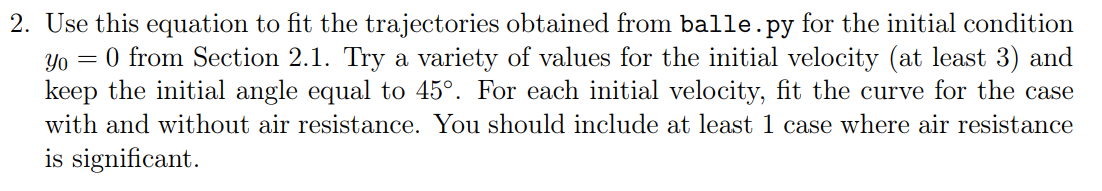

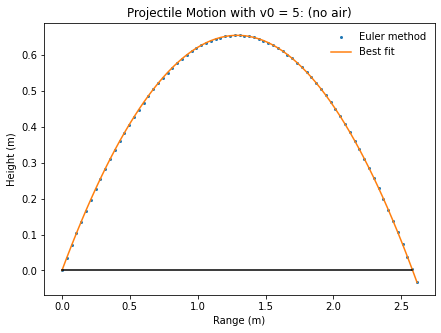

Chi-squared: 4.220434731881579e-30


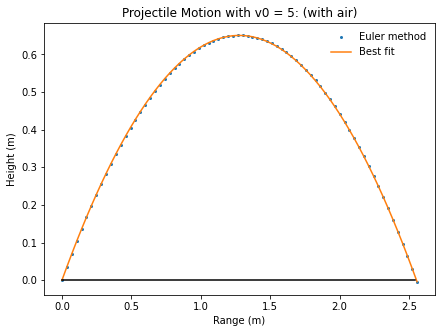

Chi-squared: 4.212223121663092e-05
------------------------------------------------



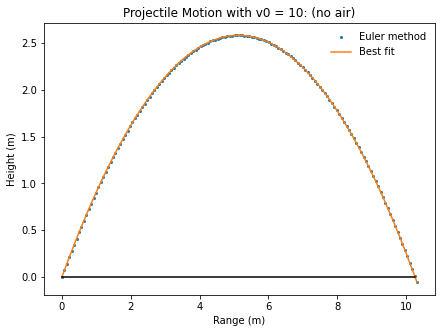

Chi-squared: 2.304481104606269e-28


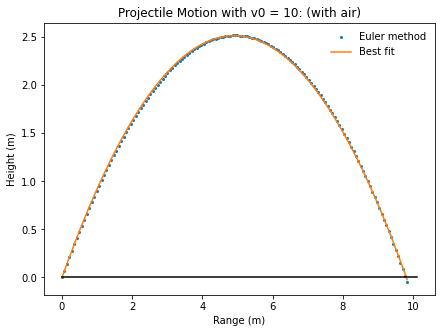

Chi-squared: 0.018126118478841945
------------------------------------------------



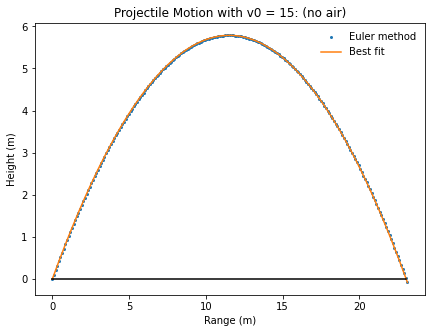

Chi-squared: 3.0479463195534176e-26


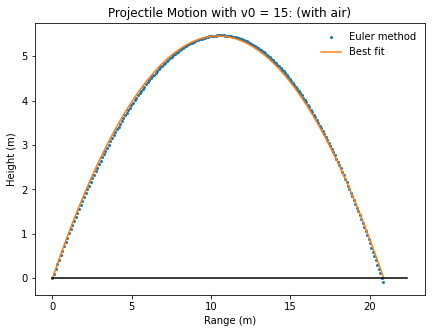

Chi-squared: 0.5586585921904048
------------------------------------------------



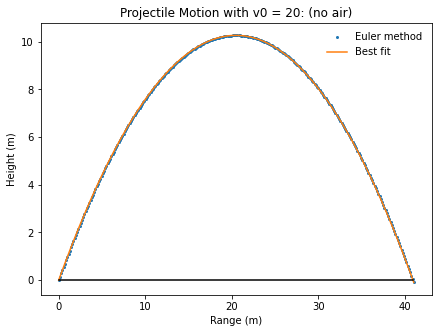

Chi-squared: 2.853695080173277e-27


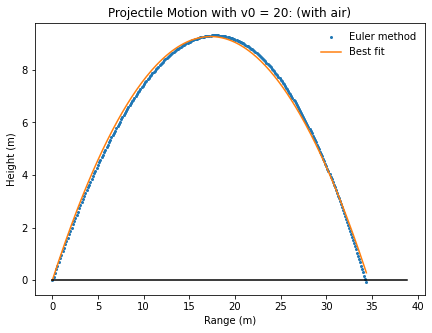

Chi-squared: 5.654463614024841
------------------------------------------------



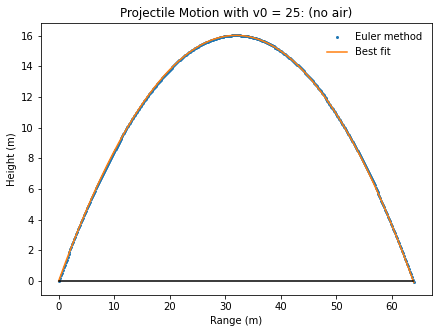

Chi-squared: 2.0641053876538697e-25


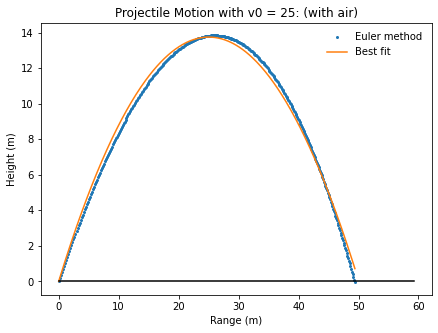

Chi-squared: 31.05456301549071
------------------------------------------------



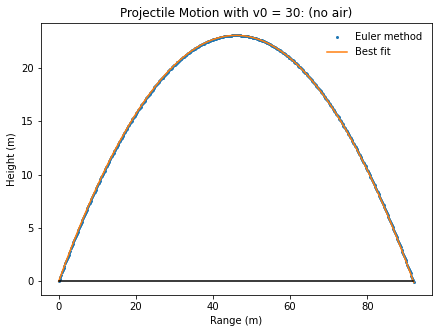

Chi-squared: 1.4085024849799707e-24


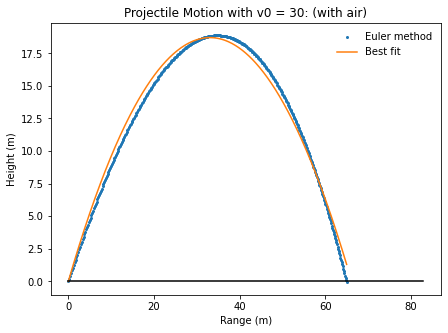

Chi-squared: 115.8118650621908
------------------------------------------------



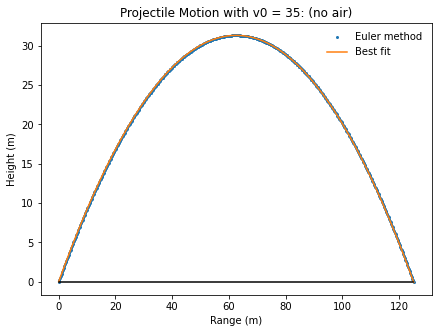

Chi-squared: 3.244630837373567e-24


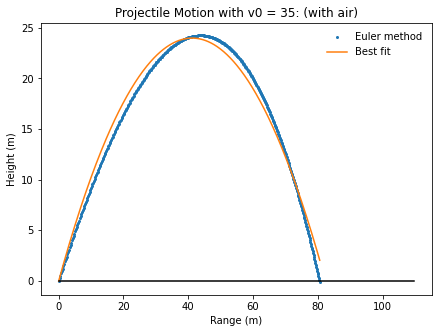

Chi-squared: 330.763668355385
------------------------------------------------



In [4]:
vels = np.arange(5, 40, 5)

for v in vels:
    partTwo(v, 0, 1)
    partTwo(v, 1, 1)
    print('------------------------------------------------\n')

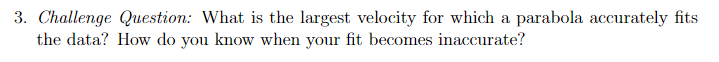

<font color="blue">We create a scheme to find where our fit for the trajectory with air-resistance performs poorly by looking at where the chi-squared value hits a tolerance value. </font>

In [5]:
tol = 50
for v in np.arange(20, 100, .005):
    y = partTwo(v, 1, 0)
    if y > tol:
        print(f'Broke at velocity = {v} chisqr = {y}')
        break


Broke at velocity = 26.694999999998668 chisqr = 50.839146668990864


<font color="blue">We expect that the regime without air resistance will have low chi-squared values even for extremely high initial velocities because the trajectory will simply closely follow the parabolic curve described by projectile motion. </font>


In [6]:
tol = .005
va = 1_000_000
for v in np.arange(va, va*3, 500_000):
    x = partTwo(v, 0, 0)
    if x > tol:
        print(f'Broke at velocity = {v} chisqr = {x}')
        break # note that this won't break for even .005 tolerance 